In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crop_yield = pd.read_csv('../data/crop_yield.csv')
pesticides = pd.read_csv('../data/pesticides.csv')
rainfall = pd.read_csv('../data/rainfall.csv')
temp = pd.read_csv('../data/temp.csv')
yield_ = pd.read_csv('../data/yield.csv')
yield_df = pd.read_csv('../data/yield_df.csv')

In [ ]:
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [ ]:
crop_yield.shape

(1000000, 10)

In [ ]:
crop_yield.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [ ]:
crop_yield.isna().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [ ]:
crop_yield.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object

In [ ]:
pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
pesticides['Domain'].unique()

array(['Pesticides Use'], dtype=object)

In [ ]:
pesticides['Element'].unique()

array(['Use'], dtype=object)

In [ ]:
pesticides['Item'].unique()

array(['Pesticides (total)'], dtype=object)

In [ ]:
pesticides['Unit'].unique()

array(['tonnes of active ingredients'], dtype=object)

In [ ]:
print(pesticides.shape)
print('le nombre de valeurs manquantes dans pesticides :\n', pesticides.isna().sum())

(4349, 7)
le nombre de valeurs manquantes dans pesticides :
 Domain     0
Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64


In [ ]:
pesticides.rename(columns={'Value':'Pesticide_use_total_tonnes'}, inplace=True)

In [ ]:
pesticides

,Domain,Area,Element,Item,Year,Unit,Pesticide_use_total_tonnes
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [ ]:
pesticides.drop(columns=['Domain','Element','Item', 'Unit'], inplace=True)

In [ ]:
pesticides

,Area,Year,Pesticide_use_total_tonnes
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
...,...,...,...
4344,Zimbabwe,2012,3375.53
4345,Zimbabwe,2013,2550.07
4346,Zimbabwe,2014,2185.07
4347,Zimbabwe,2015,2185.07


**Rainfall**

In [ ]:
rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [ ]:
rainfall.shape

(6727, 3)

In [ ]:
rainfall.columns    

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [ ]:
print(rainfall.shape)
print('le nombre de valeurs manquantes dans rainfall :\n',rainfall.isna().sum())

(6727, 3)
le nombre de valeurs manquantes dans rainfall :
  Area                              0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64


In [ ]:
rainfall.loc[rainfall.isna().any(axis=1)]

,Area,Year,average_rain_fall_mm_per_year
93,American Samoa,1985,NaN
94,American Samoa,1986,NaN
95,American Samoa,1987,NaN
96,American Samoa,1989,NaN
97,American Samoa,1990,NaN
...,...,...,...
6598,Virgin Islands (U.S.),2013,NaN
6599,Virgin Islands (U.S.),2014,NaN
6600,Virgin Islands (U.S.),2015,NaN
6601,Virgin Islands (U.S.),2016,NaN


In [ ]:
rainfall.rename(columns={' Area':'Area'}, inplace=True)

**Temp**

In [ ]:
temp

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [ ]:
temp.shape

(71311, 3)

**yield_**

In [ ]:
yield_.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
yield_

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


In [ ]:
yield_.shape

(56717, 12)

In [ ]:
yield_.isna().sum()

Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

In [ ]:
print(yield_['Domain Code'].unique())
print(yield_['Domain'].unique())
print(yield_['Element Code'].unique())
print(yield_['Element'].unique())
print(yield_['Unit'].unique())

['QC']
['Crops']
[5419]
['Yield']
['hg/ha']


In [ ]:
yield_.rename(columns={'Value':'Yield_crops_hg_per_ha'}, inplace=True)

In [ ]:
yield_.drop(columns=['Domain Code','Domain','Element Code','Element','Unit', 'Year Code'], inplace=True)

In [ ]:
yield_

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha
0,2,Afghanistan,56,Maize,1961,14000
1,2,Afghanistan,56,Maize,1962,14000
2,2,Afghanistan,56,Maize,1963,14260
3,2,Afghanistan,56,Maize,1964,14257
4,2,Afghanistan,56,Maize,1965,14400
...,...,...,...,...,...,...
56712,181,Zimbabwe,15,Wheat,2012,24420
56713,181,Zimbabwe,15,Wheat,2013,22888
56714,181,Zimbabwe,15,Wheat,2014,21357
56715,181,Zimbabwe,15,Wheat,2015,19826


**yield_df**

In [ ]:
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
yield_df.shape

(28242, 8)

In [ ]:
yield_df.isna().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
yield_df['Unnamed: 0'].unique()

array([    0,     1,     2, ..., 28239, 28240, 28241], shape=(28242,))

In [ ]:
yield_df.drop(columns=['Unnamed: 0'], inplace=True)

**Jointure yield_ et yield_df**

In [ ]:
yield_

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha
0,2,Afghanistan,56,Maize,1961,14000
1,2,Afghanistan,56,Maize,1962,14000
2,2,Afghanistan,56,Maize,1963,14260
3,2,Afghanistan,56,Maize,1964,14257
4,2,Afghanistan,56,Maize,1965,14400
...,...,...,...,...,...,...
56712,181,Zimbabwe,15,Wheat,2012,24420
56713,181,Zimbabwe,15,Wheat,2013,22888
56714,181,Zimbabwe,15,Wheat,2014,21357
56715,181,Zimbabwe,15,Wheat,2015,19826


In [ ]:
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
yield_1 = yield_.merge(yield_df, on=['Area', 'Year', 'Item'], how='inner')

In [ ]:
yield_1

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,3,Albania,56,Maize,1990,36613,36613,1485.0,121.00,16.37
1,3,Albania,56,Maize,1991,29068,29068,1485.0,121.00,15.36
2,3,Albania,56,Maize,1992,24876,24876,1485.0,121.00,16.06
3,3,Albania,56,Maize,1993,24185,24185,1485.0,121.00,16.05
4,3,Albania,56,Maize,1994,25848,25848,1485.0,201.00,16.96
...,...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,30000,657.0,3269.99,20.52
28238,181,Zimbabwe,15,Wheat,2010,27681,27681,657.0,3305.17,21.17
28239,181,Zimbabwe,15,Wheat,2011,26274,26274,657.0,3340.35,20.78
28240,181,Zimbabwe,15,Wheat,2012,24420,24420,657.0,3375.53,20.52


In [ ]:
yield_1.shape

(28242, 10)

In [ ]:
yield_1.isna().sum()

Area Code                        0
Area                             0
Item Code                        0
Item                             0
Year                             0
Yield_crops_hg_per_ha            0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
yield_1.drop(columns=['hg/ha_yield'], inplace=True)

In [ ]:
yield_1

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,3,Albania,56,Maize,1990,36613,1485.0,121.00,16.37
1,3,Albania,56,Maize,1991,29068,1485.0,121.00,15.36
2,3,Albania,56,Maize,1992,24876,1485.0,121.00,16.06
3,3,Albania,56,Maize,1993,24185,1485.0,121.00,16.05
4,3,Albania,56,Maize,1994,25848,1485.0,201.00,16.96
...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,3269.99,20.52
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,3305.17,21.17
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,3340.35,20.78
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,3375.53,20.52


**Jointure yield_1 et pesticides**

In [ ]:
pesticides

,Area,Year,Pesticide_use_total_tonnes
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
...,...,...,...
4344,Zimbabwe,2012,3375.53
4345,Zimbabwe,2013,2550.07
4346,Zimbabwe,2014,2185.07
4347,Zimbabwe,2015,2185.07


In [ ]:
yield_2 = yield_1.merge(pesticides, on=['Area', 'Year'], how='inner')

In [ ]:
yield_2

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,121.00,16.37,121.00
1,3,Albania,56,Maize,1991,29068,1485.0,121.00,15.36,121.00
2,3,Albania,56,Maize,1992,24876,1485.0,121.00,16.06,121.00
3,3,Albania,56,Maize,1993,24185,1485.0,121.00,16.05,121.00
4,3,Albania,56,Maize,1994,25848,1485.0,201.00,16.96,201.00
...,...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,3269.99,20.52,3269.99
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,3305.17,21.17,3305.17
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,3340.35,20.78,3340.35
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,3375.53,20.52,3375.53


In [ ]:
yield_2.isna().sum()

Area Code                        0
Area                             0
Item Code                        0
Item                             0
Year                             0
Yield_crops_hg_per_ha            0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
Pesticide_use_total_tonnes       0
dtype: int64

In [ ]:
yield_2.drop(columns=['pesticides_tonnes'], inplace=True)

In [ ]:
yield_2

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.00
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.00
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.00
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.00
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.00
...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,20.52,3269.99
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,21.17,3305.17
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,20.78,3340.35
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,20.52,3375.53


In [ ]:
yield_2.isna().sum()

Area Code                        0
Area                             0
Item Code                        0
Item                             0
Year                             0
Yield_crops_hg_per_ha            0
average_rain_fall_mm_per_year    0
avg_temp                         0
Pesticide_use_total_tonnes       0
dtype: int64

**Vérifions si on peut ajouter des choses des tables rainfall et temp**

In [ ]:
rainfall

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
...,...,...,...
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657


In [ ]:
temp

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


**Pour l'instant non exploitable car les deux tables sont pauvres en données**

In [ ]:
crop_yield

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [ ]:
crop_yield.groupby(['Crop','Region','Soil_Type'])[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']].mean()

Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
Crop   Region Soil_Type                                                      
Barley East   Chalky      552.471474            27.597779       104.338104   
              Clay        553.513014            27.487991       104.338795   
              Loam        550.922262            27.356389       104.218997   
              Peaty       546.663523            27.480085       104.995763   
              Sandy       550.614268            27.349931       104.097242   
...                              ...                  ...              ...   
Wheat  West   Clay        552.855918            27.477924       104.635374   
              Loam        547.534322            27.376420       104.659130   
              Peaty       549.799894            27.604580       104.428249   
              Sandy       542.031539            27.557867       104.621915   
              Silt        548.553769            27.495237       104.416595   

                         Yield_tons_per_hectare  
Crop   Region Soil_Type                          
Barley East   Chalky                   4.652501  
              Clay                     4.666006  
              Loam                     4.645959  
              Peaty                    4.643496  
              Sandy                    4.655933  
...                                         ...  
Wheat  West   Clay                     4.678361  
              Loam                     4.639419  
              Peaty                    4.640393  
              Sandy                    4.617883  
              Silt                     4.643989  

[144 rows x 4 columns]

In [ ]:
crop_agg = crop_yield.groupby('Crop').agg({
    'Rainfall_mm': 'mean',
    'Temperature_Celsius': 'mean',
    'Days_to_Harvest': 'mean',
    'Yield_tons_per_hectare': 'mean'
}).reset_index()


In [ ]:
crop_agg

,Crop,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
0,Barley,549.561147,27.500890,104.425646,4.647412
1,Cotton,549.903414,27.527394,104.533800,4.650841
2,Maize,549.195094,27.477555,104.538927,4.641387
3,Rice,550.510286,27.498745,104.500875,4.650760
4,Soybean,550.474299,27.509328,104.455945,4.653712
5,Wheat,550.248678,27.515932,104.514900,4.652740


In [ ]:
crop_yield.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

**ACP**

In [ ]:
features = [
    'Rainfall_mm',
    'Temperature_Celsius',
    'Days_to_Harvest',
    'Yield_tons_per_hectare'
]
X = crop_yield[features]

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
import numpy as np

explained_var = np.cumsum(pca.explained_variance_ratio_)
explained_var

array([0.44234888, 0.69245762, 0.94235107, 1.        ])

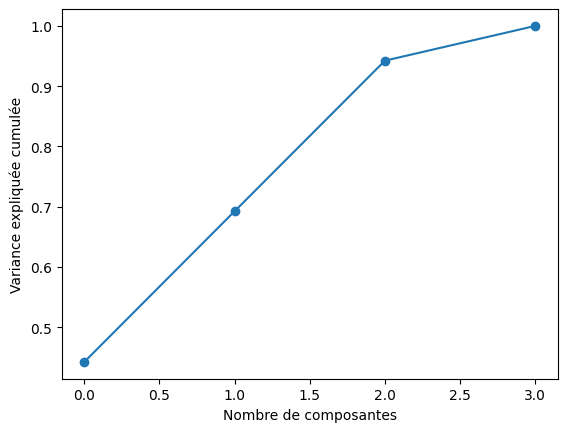

In [ ]:
import matplotlib.pyplot as plt

plt.plot(explained_var, marker='o')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.show()

In [ ]:
import pandas as pd

loadings = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=[f'PC{i+1}' for i in range(len(features))]
)
loadings


,PC1,PC2,PC3,PC4
Rainfall_mm,0.702718,-0.082998,-0.074102,-0.702715
Temperature_Celsius,0.078530,0.720829,0.684133,-0.078749
Days_to_Harvest,-0.004894,-0.688122,0.725578,-0.000132
Yield_tons_per_hectare,0.707104,-0.002334,0.002684,0.707100


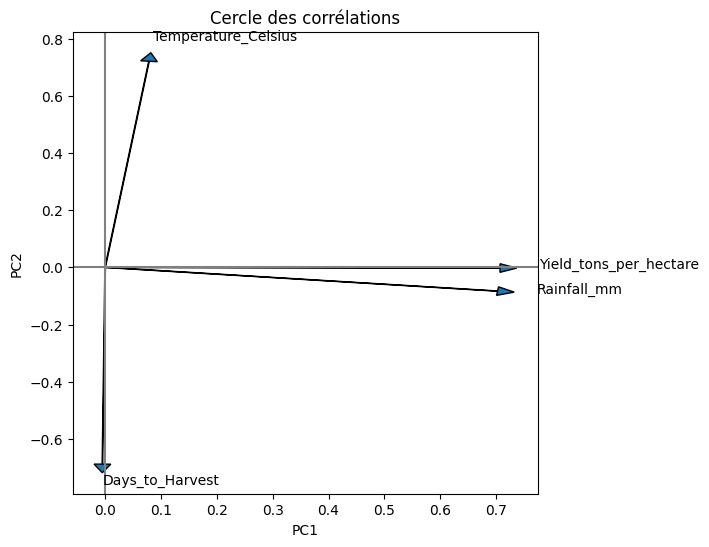

In [ ]:
import numpy as np

plt.figure(figsize=(6,6))
for i, var in enumerate(features):
    plt.arrow(0, 0, loadings.iloc[i,0], loadings.iloc[i,1],
              head_width=0.03, head_length=0.03)
    plt.text(loadings.iloc[i,0]*1.1, loadings.iloc[i,1]*1.1, var)

plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle des corrélations')
plt.show()


PC1 = axe productivité

- pluie (vers la droite)
- rendement (vers la droite)

PC2 = axe thermique
- température (vers le haut)
- durée (vers le bas)

2️⃣ Interprétation de ton ACP

🧭 PC1 = Axe de productivité

Pluie → Rendement

- Totalement logique agronomiquement
- Cohérent avec la littérature
- Fort signal métier

👉 Interprétation claire :

La pluviométrie est un facteur majeur du rendement des cultures.

🌡️ PC2 = Axe thermique / physiologique

Température (haut) ↔ Durée de cycle (bas)

- Très bon diagnostic
- Relation biologiquement crédible

👉 Lecture :

températures élevées → cycles plus courts

températures plus basses → maturation plus longue


Dans les zones à faible pluviométrie, les cultures à cycle court pourraient être privilégiées afin de limiter les pertes de rendement.

In [ ]:
import matplotlib.pyplot as plt

def plot_correlation_circle(loadings, features, pc_x, pc_y):
    plt.figure(figsize=(6,6))
    
    for i, var in enumerate(features):
        plt.arrow(
            0, 0,
            loadings.iloc[i, pc_x],
            loadings.iloc[i, pc_y],
            head_width=0.03,
            head_length=0.03
        )
        plt.text(
            loadings.iloc[i, pc_x]*1.1,
            loadings.iloc[i, pc_y]*1.1,
            var
        )

    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.xlabel(f'PC{pc_x+1}')
    plt.ylabel(f'PC{pc_y+1}')
    plt.title(f'Cercle des corrélations (PC{pc_x+1} vs PC{pc_y+1})')
    plt.grid()
    plt.show()


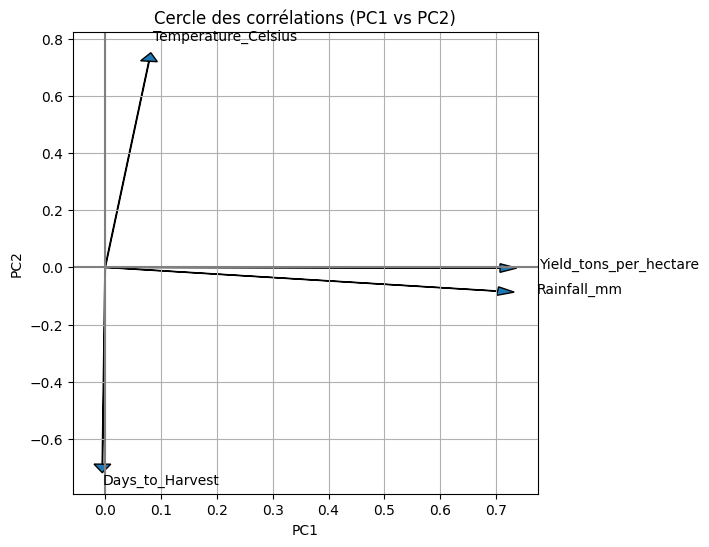

In [ ]:
plot_correlation_circle(loadings, features, 0, 1)


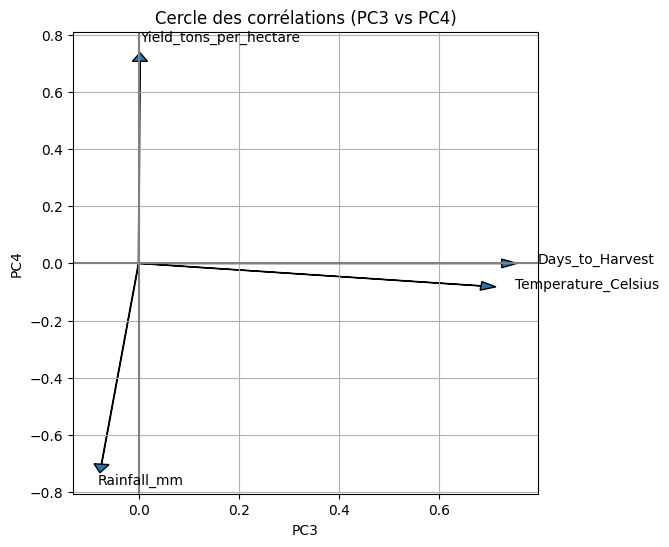

In [ ]:
plot_correlation_circle(loadings, features, 2, 3)

In [ ]:
crop_yield.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [ ]:
# Intensité agronomique
fertilizer_proxy = (crop_yield.groupby('Crop')['Fertilizer_Used'].mean())
# Besoin en eau
irrigation_proxy = (crop_yield.groupby('Crop')['Irrigation_Used'].mean())
# Cycle culturel
harvest_proxy = (crop_yield.groupby('Crop')['Days_to_Harvest'].mean())

In [ ]:
irrigation_proxy

In [ ]:
crop_yield

In [ ]:
yield_2

Fusion des proxies dans yield_2

In [917]:
'''
yield_3 = yield_2.merge(fertilizer_proxy, left_on='Item',right_index=True, how='left')
yield_3 = yield_3.merge(irrigation_proxy, left_on='Item',right_index=True, how='left')
yield_3 = yield_3.merge(harvest_proxy, left_on='Item',right_index=True, how='left')
'''

"\nyield_3 = yield_2.merge(fertilizer_proxy, left_on='Item',right_index=True, how='left')\nyield_3 = yield_3.merge(irrigation_proxy, left_on='Item',right_index=True, how='left')\nyield_3 = yield_3.merge(harvest_proxy, left_on='Item',right_index=True, how='left')\n"

In [918]:
yield_2

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.00
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.00
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.00
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.00
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.00
...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,20.52,3269.99
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,21.17,3305.17
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,20.78,3340.35
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,20.52,3375.53


### Traitement des données 

#### Encodage

In [919]:
data = yield_2.copy()

In [920]:
data.head()

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.0
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.0
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.0
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.0
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.0


In [921]:
data.select_dtypes(exclude=['float64', 'int64']).columns

Index(['Area', 'Item'], dtype='object')

In [922]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [923]:
def appliquer_onehot_encoding(df, colonnes):

    # Sélectionner uniquement les colonnes existantes dans le DataFrame
    colonnes_existantes = [col for col in colonnes if col in df.columns]

    if colonnes_existantes:
        ohe = OneHotEncoder(sparse_output=False, drop=None)
        encodage = ohe.fit_transform(df[colonnes_existantes])

        # Créer les noms de colonnes encodées
        noms_colonnes = ohe.get_feature_names_out(colonnes_existantes)

        # Créer un DataFrame avec les colonnes encodées
        df_encoded = pd.DataFrame(encodage, columns=noms_colonnes, index=df.index)

        # Concaténer avec le DataFrame d’origine
        df = pd.concat([df, df_encoded], axis=1)
    else:
        print("⚠️ Aucune des colonnes spécifiées n’est présente dans le DataFrame.")

    return df

In [924]:
col_to_ohe = ['Area', 'Item']

In [925]:
data_encoded = appliquer_onehot_encoding(data, col_to_ohe)

In [926]:
data_encoded

,Area Code,Area,Item Code,Item,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes,Area_Albania,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,3,Albania,56,Maize,1990,36613,1485.0,16.37,121.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,Albania,56,Maize,1991,29068,1485.0,15.36,121.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Albania,56,Maize,1992,24876,1485.0,16.06,121.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Albania,56,Maize,1993,24185,1485.0,16.05,121.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,Albania,56,Maize,1994,25848,1485.0,16.96,201.00,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,181,Zimbabwe,15,Wheat,2009,30000,657.0,20.52,3269.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28238,181,Zimbabwe,15,Wheat,2010,27681,657.0,21.17,3305.17,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28239,181,Zimbabwe,15,Wheat,2011,26274,657.0,20.78,3340.35,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28240,181,Zimbabwe,15,Wheat,2012,24420,657.0,20.52,3375.53,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Séparation de la cible du reste 

l'identifiant unique ici est Area/Area Code et Item/Item Code et Year

la cible ici est la variable Yield_crops_hg_per_ha, séparons là du reste du dataset

In [927]:
data_cible = pd.DataFrame(data_encoded[['Area', 'Item', 'Year', 'Yield_crops_hg_per_ha']])

In [928]:
data_study = data_encoded.drop(columns=['Area Code', 'Item Code','Yield_crops_hg_per_ha'])

In [929]:
data_cible

,Area,Item,Year,Yield_crops_hg_per_ha
0,Albania,Maize,1990,36613
1,Albania,Maize,1991,29068
2,Albania,Maize,1992,24876
3,Albania,Maize,1993,24185
4,Albania,Maize,1994,25848
...,...,...,...,...
28237,Zimbabwe,Wheat,2009,30000
28238,Zimbabwe,Wheat,2010,27681
28239,Zimbabwe,Wheat,2011,26274
28240,Zimbabwe,Wheat,2012,24420


In [930]:
data_study

,Area,Item,Year,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,Albania,Maize,1990,1485.0,16.37,121.00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,Maize,1991,1485.0,15.36,121.00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Albania,Maize,1992,1485.0,16.06,121.00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,Maize,1993,1485.0,16.05,121.00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,Maize,1994,1485.0,16.96,201.00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,Zimbabwe,Wheat,2009,657.0,20.52,3269.99,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28238,Zimbabwe,Wheat,2010,657.0,21.17,3305.17,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28239,Zimbabwe,Wheat,2011,657.0,20.78,3340.35,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28240,Zimbabwe,Wheat,2012,657.0,20.52,3375.53,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [931]:
X=data_study
y=data_cible['Yield_crops_hg_per_ha']   

In [932]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [933]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [934]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        n_estimators=300
    ))
])

In [935]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [936]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("R² :", r2)


RMSE : 13343.923918176477
R² : 0.9751333823538837


1️⃣ Interprétation technique des résultats

**📉 RMSE = 13 343 hg/ha**

👉 En unités métier :

13 343 hectogrammes / hectare = 1,33 tonne / hectare

➡️ L’erreur moyenne du modèle est d’environ ±1,3 t/ha.

Pour de l’agriculture à grande échelle, c’est très bon.

**📈 R² = 0,975**

👉 Interprétation :

97,5 % de la variance du rendement expliquée

modèle très performant

capture correctement :

climat

intrants

différences entre cultures et pays

⚠️ Mais… possible sur-apprentissage (à vérifier)

**FEATURES IMPORTANCES**

In [937]:
import pandas as pd

# Récupérer le modèle entraîné
rf_model = pipeline.named_steps['model']

# Récupérer les noms des features après encodage
feature_names = (
    num_features +
    list(
        pipeline.named_steps['preprocessing']
        .named_transformers_['cat']
        .get_feature_names_out(cat_features)
    )
)

# Créer le DataFrame des importances
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

importance_df.head(15)


,feature,importance
107,Item_Potatoes,0.375220
104,Item_Cassava,0.096801
111,Item_Sweet potatoes,0.087837
2,Pesticide_use_total_tonnes,0.087639
1,avg_temp,0.055819
45,Area_India,0.055701
0,average_rain_fall_mm_per_year,0.043232
113,Item_Yams,0.027496
51,Area_Japan,0.018767
8,Area_Australia,0.016074


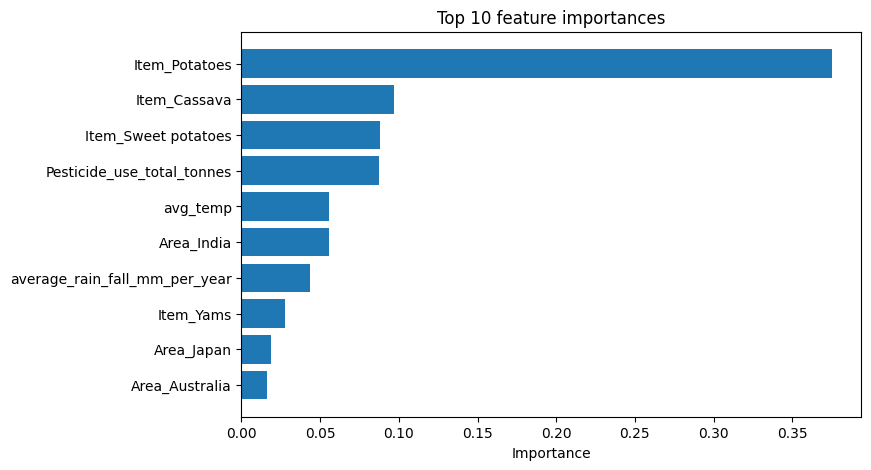

In [938]:
import matplotlib.pyplot as plt

top_features = importance_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_features['feature'], top_features['importance'])
plt.gca().invert_yaxis()
plt.title('Top 10 feature importances')
plt.xlabel('Importance')
plt.show()


2️⃣ Analyse variable par variable (Top 10)

🥔 Item_Potatoes (très dominant ~0.38)

➡️ La culture de la pomme de terre est le facteur le plus discriminant

Interprétation métier :

Les pommes de terre ont un rendement intrinsèquement élevé

Elles sont très sensibles aux conditions → le modèle les utilise comme repère fort

📌 Recommandation :

Si les conditions climatiques sont favorables, la pomme de terre est une culture à fort potentiel de rendement.

🌿 Item_Cassava & Item_Sweet potatoes

➡️ Cultures très productives, souvent en zones tropicales

Interprétation :

Rendements élevés même avec moins d’intrants

Bonne résilience climatique

📌 Recommandation :

Cultures adaptées aux régions chaudes, bonnes candidates pour sécuriser le rendement.

🧪 Pesticide_use_total_tonnes

➡️ Variable quantitative clé

Lecture importante :

Les pesticides jouent un rôle significatif mais non dominant

Effet de soutien, pas moteur principal

📌 Message métier fort :

L’usage des pesticides améliore le rendement, mais ne compense pas une culture ou un climat inadapté.

🌡️ avg_temp

➡️ Variable climatique majeure

Lien direct avec ton ACP :

PC2 = axe thermique ✔

Le modèle confirme que la température structure le rendement

📌 Recommandation :

Adapter le choix des cultures à la plage thermique locale.

🌧️ average_rain_fall_mm_per_year

➡️ Présente mais moins dominante que prévu

Pourquoi ?

La pluie est corrélée à d’autres variables (Area, Item)

Random Forest répartit l’importance

📌 Message clé :

La pluie est nécessaire, mais son effet dépend fortement de la culture.

🌍 Area_India, Area_Japan, Area_Australia

➡️ Effet géographique structurel

Interprétation :

Sols, pratiques agricoles, climat moyen

Effet pays plus que météo ponctuelle

📌 Recommandation :

Les stratégies agricoles doivent être adaptées localement, même pour une même culture.

Le modèle met en évidence que le rendement agricole dépend en priorité du type de culture, notamment les tubercules comme la pomme de terre et le manioc, suivis des conditions climatiques et de l’usage des pesticides. Les variables géographiques confirment que le contexte local joue un rôle structurant. Ces résultats sont cohérents avec l’analyse en composantes principales, qui identifiait la pluie et la température comme axes majeurs de productivité.

#### Gradiant boosting

In [940]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Préprocesseur adapté (sortie dense obligatoire)
preprocessor_gb = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)

# Modèle
gbr_model = HistGradientBoostingRegressor(
    max_depth=8,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

# Pipeline
gbr_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_gb),
    ('model', gbr_model)
])

# Entraînement
gbr_pipeline.fit(X_train, y_train)

# Prédiction
y_pred = gbr_pipeline.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting | RMSE : {rmse:.2f}")
print(f"Gradient Boosting | R² : {r2:.4f}")


Gradient Boosting | RMSE : 19487.98
Gradient Boosting | R² : 0.9470


In [945]:
data.describe()

,Area Code,Item Code,Year,Yield_crops_hg_per_ha,average_rain_fall_mm_per_year,avg_temp,Pesticide_use_total_tonnes
count,28242.000000,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,107.279831,102.156929,2001.544296,77053.332094,1149.05598,20.542627,37076.909344
std,64.984983,84.850640,7.051905,84956.612897,709.81215,6.312051,59958.784665
min,1.000000,15.000000,1990.000000,50.000000,51.00000,1.300000,0.040000
25%,56.000000,27.000000,1995.000000,19919.250000,593.00000,16.702500,1702.000000
50%,100.000000,83.000000,2001.000000,38295.000000,1083.00000,21.510000,17529.440000
75%,157.000000,122.000000,2008.000000,104676.750000,1668.00000,26.000000,48687.880000
max,276.000000,489.000000,2013.000000,501412.000000,3240.00000,30.650000,367778.000000
